<a href="https://colab.research.google.com/github/Sharandeep02/python-practicing/blob/master/titanic_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd drive/My Drive/Colab Notebooks/titanic data

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/titanic data'
/content/drive/My Drive/Colab Notebooks/titanic data


In [ ]:

#import libraries
import numpy as np
import pandas as pd
import pandas_profiling
#data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
#ml algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
#from vecstack import stacking
from sklearn import tree
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import torch
import torch.nn as nn

import os 
for dirname, _,filenames in os.walk('/drive/My drive'):
  for filenames in filename:
    print(os.path.join (dirname,filename))
#create data handles

train_data=pd.read_csv("train.csv")   
test_data=pd.read_csv("test.csv")   

In [ ]:
# here we create a useful function to display all important confusion matrix metrics
def display_confusion_matrix(target, prediction, score=None):
    cm = metrics.confusion_matrix(target, prediction)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    if score:
        score_title = 'Accuracy Score: {0}'.format(round(score, 5))
        plt.title(score_title, size = 14)
    classification_report = pd.DataFrame.from_dict(metrics.classification_report(target, prediction, output_dict=True))
    display(classification_report.round(2))

In [ ]:
ls


gender_submission.csv  test.csv  train.csv


ls 

In [ ]:
train_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test_data.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#another way to see the percentage of missing values in each catagories
total=train_data.isnull().sum().sort_values(ascending=False)
per1=train_data.isnull().sum()/train_data.isnull().count()*100 
per2=(round(per1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,per2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
%time
#train_data.profile report()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


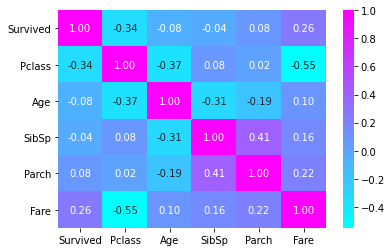

In [ ]:
%matplotlib inline

ht = sns.heatmap(train_data.iloc[:, 1:].corr(),
                annot=True, 
                fmt = ".2f", 
                cmap = "cool")
ht


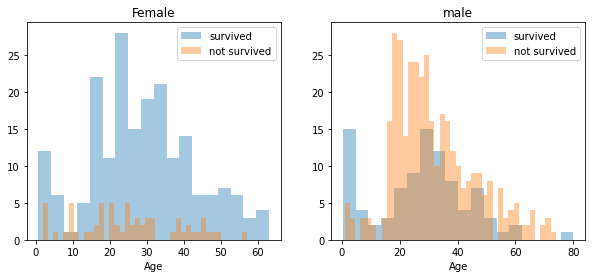

In [ ]:
# do preliminary analysis of features to see which ones to use
%matplotlib inline
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)

ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)

ax.legend()
_ = ax.set_title('male')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


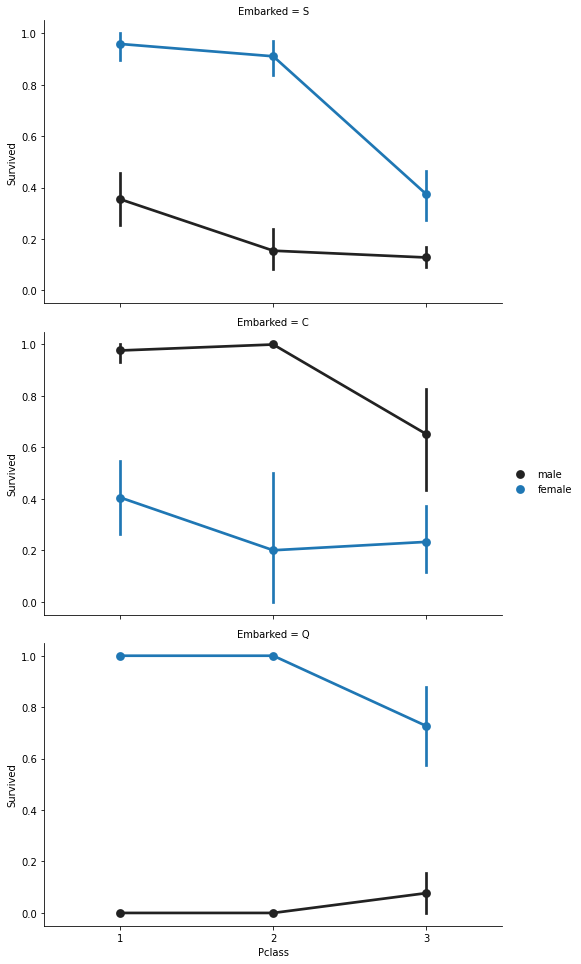

In [ ]:
%matplotlib inline
# women on port Q and S have a higher chance of survival
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()


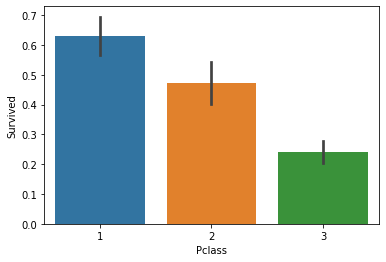

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
#the higher the class the better probability of survival


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


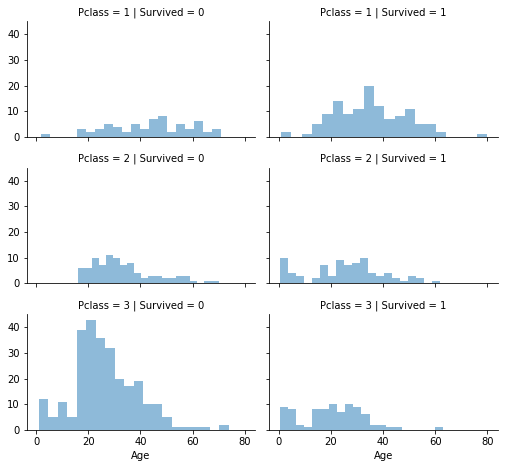

In [ ]:


grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
test_data['Fare'].isnull().values.any()

True

In [ ]:
# SIBSP PARCH - create RELATIVES feature
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


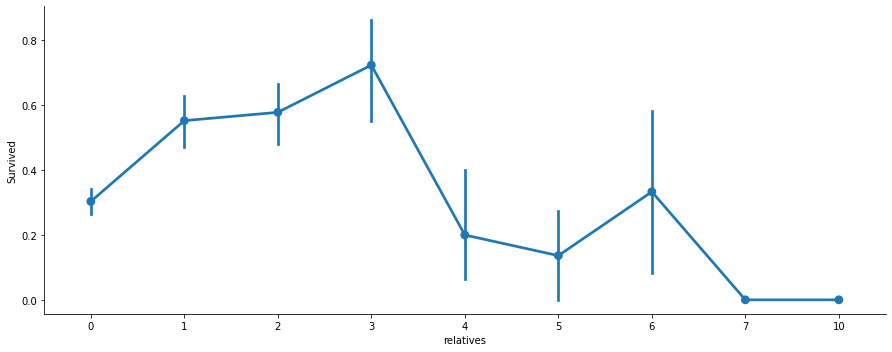

In [ ]:

axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, )
# higher probability of survival with 1 to 3 relatives (and in some cases with 6 relatives)

In [ ]:
#passenger id
# remove PASSENGERID from train set since it is irrelevant to predicted survival probability
train_data = train_data.drop(['PassengerId'], axis=1)

# but do not remove it from test set, since it is required for submission

In [ ]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [ ]:

# Transform CABIN feature - create a number feature "DECK" from it

import re
data = [train_data, test_data]

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [ ]:
train_data.head()
# cabin is now deck

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


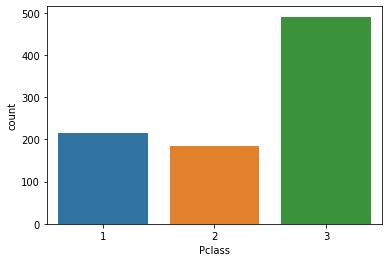

In [ ]:
#pclass value distribution 
g=sns.countplot(train_data["Pclass"],order=[1,2,3])

In [ ]:
def stacked_bars(feature):
    deck_1 = train_data[train_data['Deck']==1][feature].value_counts()
    deck_2 = train_data[train_data['Deck']==2][feature].value_counts()
    deck_3 = train_data[train_data['Deck']==3][feature].value_counts()
    deck_4 = train_data[train_data['Deck']==4][feature].value_counts()
    deck_5 = train_data[train_data['Deck']==5][feature].value_counts()
    deck_6 = train_data[train_data['Deck']==6][feature].value_counts()
    deck_7 = train_data[train_data['Deck']==7][feature].value_counts()
    deck_8 = train_data[train_data['Deck']==8][feature].value_counts()
    
    df = pd.DataFrame([deck_1, deck_2, deck_3, deck_4, deck_5, deck_6, deck_7, deck_8])
    df.index=['1','2','3','4','5','6','7','8']
    ax = df.plot(kind='bar',stacked=True,title='feature distribution')
    ax.set_xlabel("Decks")
    ax.set_ylabel(feature)

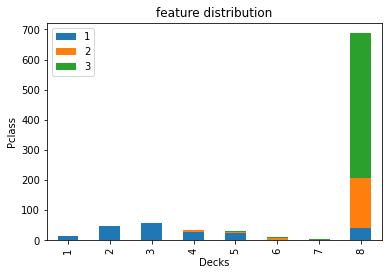

In [ ]:
stacked_bars('Pclass')
# decks 1,2,3 are 100% first class
# so we see that most of 1st class passengers are on Decks 2 & 3

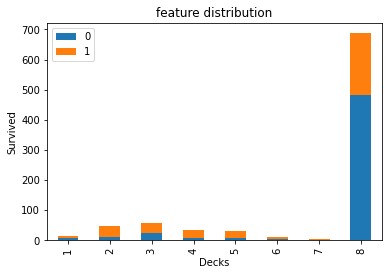

In [ ]:
stacked_bars('Survived')
# 1 or blue means survived

In [ ]:
 #Missing AGE values: create an array of random numbers 
# computed based on the mean age in regards to the std dev and is_null

data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    # low, high, size
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

train_data["Age"].isnull().sum()

0

In [ ]:



train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
train_data.info()
# now we have 4 categorical(object) features: Name, Sex, Ticket and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data: 
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:

# AGE feature values transform from float to int categories
data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
train_data['Age'].value_counts()

4    170
6    157
5    148
3    130
2    122
1     96
0     68
Name: Age, dtype: int64

In [ ]:
# fare tranform from float to int
data=[train_data,test_data]
for dataset in data:
  dataset['Fare']=dataset['Fare'].fillna(0)
  dataset['Fare']=dataset['Fare'].astype(int)

In [ ]:
#fare
data = [train_data, test_data]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


In [ ]:
# from NAME extract TITLES to test a new feature
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # select Name column from each dataset & extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with Rare or with one of 5 titles
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
                                                'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles to numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # fill NaN with 0
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [ ]:
# SEX convert to numeric
genders = {"male": 0, "female": 1}
data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:

# TICKET
train_data['Ticket'].describe()

#since there are 681 unique values, cannot convert them to useful categories

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
# so we drop TICKET
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [ ]:
train_data.describe()

# 38% have survived according to the train data set
# now there are no more missing values

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,3.470258,0.523008,0.381594,1.523008,0.361392,0.904602,0.602694,6.936027,1.728395
std,0.486592,0.836071,0.477990,1.865103,1.102743,0.806057,1.250743,0.635673,1.613459,0.489615,2.074282,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
50%,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,1.000000
75%,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,8.000000,2.000000
max,1.000000,3.000000,1.000000,6.000000,8.000000,6.000000,5.000000,2.000000,10.000000,1.000000,8.000000,5.000000


In [ ]:
# AGE CLASS feature

data = [train_data, test_data]
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [ ]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,0,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15
5,0,3,0,4,0,0,1,2,0,1,8,1,12
6,0,1,0,6,0,0,3,0,0,1,5,1,6
7,0,3,0,0,3,1,2,0,4,0,8,4,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9
9,1,2,1,1,1,0,2,1,1,0,8,3,2


In [ ]:
# for train data we drop the Survived column
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]

# PassengerId is necessary for submission so we make a copy and delete PassengerId in this copy
X_test  = test_data.drop("PassengerId", axis=1).copy()

In [ ]:
X_train = X_train.drop("Title", axis=1)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class
0,3,0,2,1,0,0,0,1,0,8,6
1,1,1,5,1,0,3,1,1,0,3,5
2,3,1,3,0,0,0,0,0,1,8,9
3,1,1,5,1,0,3,0,1,0,3,5
4,3,0,5,0,0,1,0,0,1,8,15
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,1,0,0,1,8,6
887,1,1,2,0,0,2,0,0,1,2,2
888,3,1,4,1,2,2,0,3,0,8,12
889,1,0,3,0,0,2,1,0,1,3,3


In [ ]:

X_test = X_test.drop("Title", axis=1)

In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class
0,3,0,2,0,0,0,2,0,1,8,6
1,3,1,5,1,0,0,0,1,0,8,15
2,2,0,3,0,0,1,2,0,1,8,6
3,3,0,5,0,0,1,0,0,1,8,15
4,3,1,5,1,1,1,0,2,0,8,15
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,4,0,0,1,0,0,1,8,12
414,1,1,6,0,0,4,1,0,1,3,6
415,3,0,3,0,0,0,0,0,1,8,9
416,3,0,5,0,0,1,0,0,1,8,15


In [ ]:
decision_tree = DecisionTreeClassifier()

# fit
decision_tree.fit(X_train, Y_train)

# predict
Y_pred_dt = decision_tree.predict(X_test)


# score
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

acc_decision_tree

92.59

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


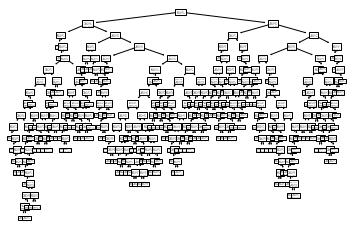

In [ ]:
%time
tree.plot_tree(decision_tree);

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

# fit
random_forest.fit(X_train, Y_train)

# predict
Y_pred_rf = random_forest.predict(X_test)

# score
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

92.59

In [ ]:
linear_svc = LinearSVC()

# fit
linear_svc.fit(X_train, Y_train)

# predict
Y_pred_lsvm = linear_svc.predict(X_test)

# score
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

acc_linear_svc


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.47

In [ ]:
svm = SVC(C=5, random_state=42)

# fit
svm.fit(X_train, Y_train)

# predict
Y_pred_svm = svm.predict(X_test)

# score
acc_svm = round(svm.score(X_train, Y_train) * 100, 2)

acc_svm


82.83

In [ ]:
logreg = LogisticRegression(C=5, penalty='l2',random_state=42)

# fit
logreg.fit(X_train, Y_train)

# predict
Y_pred_lr = logreg.predict(X_test)

# score
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

acc_log

80.13

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

# fit
knn.fit(X_train, Y_train)

# predict
Y_pred_knn = knn.predict(X_test)

# score
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

acc_knn

85.63

In [ ]:
gaussian = GaussianNB()

# fit
gaussian.fit(X_train, Y_train)

# predict
Y_pred_gnb = gaussian.predict(X_test)

# score
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

acc_gaussian

77.55

In [ ]:
perceptron = Perceptron(max_iter = 5)

# fit
perceptron.fit(X_train, Y_train)

# predict
Y_pred_p = perceptron.predict(X_test)

# score
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


79.8

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

#fit
sgd.fit(X_train, Y_train)

#predict
Y_pred_sgd = sgd.predict(X_test)

#score
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

acc_sgd

71.72

In [ ]:
def build_ann(optimizer='adam'):
    
    # Initializing our ANN
    ann = Sequential()
    
    # Adding the input layer and the first hidden layer of our ANN with dropout
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(11,)))
    
    
    # Add other layers, it is not necessary to pass the shape because there is a layer before
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    
    
    # Adding the output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compiling the ANN
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

In [ ]:
# we divide training set(for which we have both x & y values) into X&Y subsets for Keras neural network
X_train_4nn, X_test_4nn, Y_train_4nn, Y_test_4nn = train_test_split(X_train, Y_train, 
                                                                    test_size=0.2, random_state=42)
opt = optimizers.Adam(lr=0.001)
ann = build_ann(opt)
# Fit ANN
history = ann.fit(X_train_4nn, Y_train_4nn, batch_size=13, epochs=25, 
                  validation_data=(X_test_4nn, Y_test_4nn))


Train on 712 samples, validate on 179 samples
Epoch 1/25
712/712 [==============================] - 0s 383us/step - loss: 0.8913 - accuracy: 0.5730 - val_loss: 0.6098 - val_accuracy: 0.6704
Epoch 2/25
712/712 [==============================] - 0s 122us/step - loss: 0.6588 - accuracy: 0.6404 - val_loss: 0.5927 - val_accuracy: 0.7318
Epoch 3/25
712/712 [==============================] - 0s 123us/step - loss: 0.6395 - accuracy: 0.6447 - val_loss: 0.5810 - val_accuracy: 0.7374
Epoch 4/25
712/712 [==============================] - 0s 124us/step - loss: 0.6116 - accuracy: 0.6812 - val_loss: 0.5603 - val_accuracy: 0.7486
Epoch 5/25
712/712 [==============================] - 0s 127us/step - loss: 0.5926 - accuracy: 0.7065 - val_loss: 0.5488 - val_accuracy: 0.7598
Epoch 6/25
712/712 [==============================] - 0s 122us/step - loss: 0.5792 - accuracy: 0.7051 - val_loss: 0.5200 - val_accuracy: 0.7486
Epoch 7/25
712/712 [==============================] - 0s 119us/step - loss: 0.5715 - accur

,0,1,accuracy,macro avg,weighted avg
precision,0.82,0.78,0.8,0.80,0.8
recall,0.86,0.73,0.8,0.79,0.8
f1-score,0.84,0.76,0.8,0.80,0.8
support,105.00,74.00,0.8,179.00,179.0


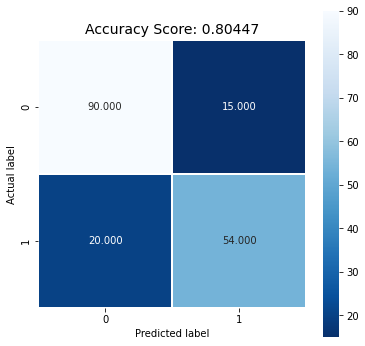

In [ ]:
# Predict
ann_prediction = ann.predict(X_test_4nn)
ann_prediction = (ann_prediction > 0.5) # convert probabilities to binary output

# Score - compute error between predicted data and true response and display it in confusion matrix
score = metrics.accuracy_score(Y_test_4nn, ann_prediction)
display_confusion_matrix(Y_test_4nn, ann_prediction, score=score)

In [ ]:
# we divide training set(for which we have both x & y values) into X&Y subsets for TensorFlow NN
X_train_4tf, X_test_4tf, Y_train_4tf, Y_test_4tf = train_test_split(X_train, Y_train, 
                                                                    test_size=0.2, random_state=42)

In [ ]:
X_train_4tf

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_Class
331,1,0,6,0,0,2,0,0,1,3,6
733,2,0,3,0,0,1,0,0,1,8,6
382,3,0,4,0,0,0,0,0,1,8,12
704,3,0,3,1,0,0,0,1,0,8,9
813,3,1,0,4,2,2,0,6,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...
106,3,1,2,0,0,0,0,0,1,8,6
270,1,0,2,0,0,2,0,0,1,8,2
860,3,0,6,2,0,1,0,2,0,8,18
435,1,1,1,1,2,4,0,3,0,2,1


In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,0,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15


In [ ]:

Pclass = tf.feature_column.numeric_column("Pclass")
Sex = tf.feature_column.numeric_column("Sex")
Age = tf.feature_column.numeric_column("Age")
SibSp = tf.feature_column.numeric_column("SibSp")
Parch = tf.feature_column.numeric_column("Parch")
Fare = tf.feature_column.numeric_column("Fare")
Embarked = tf.feature_column.numeric_column("Embarked")
#relatives = tf.feature_column.numeric_column("relatives")
#not_alone = tf.feature_column.numeric_column("not_alone")
#Deck = tf.feature_column.numeric_column("Deck")
#Title = tf.feature_column.numeric_column("Title")
Age_Class = tf.feature_column.numeric_column("Age_Class")
#Fare_Per_Person = tf.feature_column.numeric_column("Fare_Per_Person")

feat_cols = [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Age_Class]

In [ ]:
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train_4tf,
                                               y=Y_train_4tf,
                                               batch_size=100,
                                               num_epochs=None,
                                               shuffle=True)

model = tf.estimator.LinearClassifier(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdbt_7zln', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
%%time
# 10000 steps so that it doesn't run forever
model.train(input_fn=input_func, max_steps=10000)

pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test_4tf,batch_size=len(X_test_4tf),shuffle=False)

predictions = list(model.predict(input_fn=pred_fn))
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])
    
from sklearn.metrics import classification_report
print(classification_report(Y_test_4tf,final_preds))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpdbt_7zln/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 290.9
INFO:tensorflow:loss = 0.5225481, step = 100 (0.346 sec)
INFO:tensorflow:global_step/sec: 331.496
INFO:tensorflow:loss = 0.45671764, step = 200 (0.306 sec)
INFO:tensorflow:global_step/sec: 330.446
INFO:tensorflow:loss = 0.42737052, step = 300 (0.303 sec)
INFO:tensorflow:global_step/sec: 359.432
INFO:tensorflow:loss = 0.46564922, step = 400 (0.274 sec)
INFO:tensorflow:global_step/sec: 349.972
INFO:tensorflow:loss = 0.45613557, step = 500 (0.284 sec)
INFO

In [ ]:
gb = GradientBoostingClassifier(
            #loss='exponential',
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.5,
            random_state=0).fit(X_train, Y_train)

# fit
gb.fit(X_train, Y_train)

# predict
Y_pred_gb = gb.predict(X_test)

# score
gb_acc = round(gb.score(X_train, Y_train) * 100, 2)

gb_acc

91.02

In [ ]:
xgb = XGBClassifier(max_depth=5, learning_rate=0.1, n_jobs=-1, nthread=-1, 
                    gamma=0.06, min_child_weight=5, 
                    subsample=1, colsample_bytree=0.9, 
                    reg_alpha=0, reg_lambda=0.5, 
                    random_state=42)

# fit
xgb.fit(X_train, Y_train)

# predict
Y_pred_xgb = xgb.predict(X_test)

# score
xgb_acc = round(xgb.score(X_train, Y_train) * 100, 2)

xgb_acc

86.42

In [ ]:
lgbm = LGBMClassifier(num_leaves=31, learning_rate=0.1, 
                      n_estimators=64, random_state=42, n_jobs=-1)

# fit
lgbm.fit(X_train, Y_train)

# predict
Y_pred_lgbm = lgbm.predict(X_test)
    
# score
lgbm_acc = round(lgbm.score(X_train, Y_train) * 100, 2)

lgbm_acc 

88.44

In [ ]:
# We pick some of the best performing models to be the first layer of the stack 
# XGB is set at layer 2 to make the final prediction

# we divide our training set for which we have both x & y values into subsets - X&Y for stacking
X_train_4s, X_test_4s, Y_train_4s, Y_test_4s = train_test_split(X_train, Y_train, test_size=0.2)

In [ ]:
pip install vecstack

In [ ]:


models = [random_forest, knn, lgbm]
# perform stacking
from vecstack import stacking
S_train, S_test = stacking(models,
                           X_train_4s, Y_train_4s, X_test_4s,
                           regression=False,
                           mode='oof_pred_bag',
                           n_folds=5,
                           save_dir=None,
                           needs_proba=False,
                           random_state=42,
                           stratified=True,
                           shuffle=True,
                           verbose=2
                          )

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.83916084]
    fold  1:  [0.79020979]
    fold  2:  [0.80281690]
    fold  3:  [0.86619718]
    fold  4:  [0.78169014]
    ----
    MEAN:     [0.81601497] + [0.03185051]
    FULL:     [0.81601124]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.72027972]
    fold  1:  [0.67132867]
    fold  2:  [0.77464789]
    fold  3:  [0.78873239]
    fold  4:  [0.72535211]
    ----
    MEAN:     [0.73606816] + [0.04199340]
    FULL:     [0.73595506]

model  2:     [LGBMClassifier]
    fold  0:  [0.84615385]
    fold  1:  [0.79020979]
    fold  2:  [0.80985915]
    fold  3:  [0.85915493]
    fold  4:  [0.78873239]
    ----
    MEAN:     [0.81882202] + [0.02890727]
    FULL:     [0.81882022]



In [ ]:
# Fit the 2nd level model on the output of level 1
xgb.fit(S_train, Y_train_4s)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.06,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=-1,
              nthread=-1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Make predictions on the localized test set
stacked_pred = xgb.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(Y_test_4s, stacked_pred))

Final prediction score: [0.81005587]


In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_data = results.sort_values(by='Score', ascending=False)
result_data = result_data.set_index('Score')
result_data.head(9)


,Model
Score,
92.59,Random Forest
92.59,Decision Tree
85.63,KNN
80.47,Support Vector Machines
80.13,Logistic Regression
79.80,Perceptron
77.55,Naive Bayes
71.72,Stochastic Gradient Decent


In [ ]:
# training data is split into K subsets (folds)
# model is trained and evaluated K times

# the following code performs cross-validation 10 times
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74444444 0.80898876 0.76404494 0.84269663 0.88764045 0.83146067
 0.76404494 0.79775281 0.85393258 0.83146067]
Mean: 0.8126466916354558
Standard Deviation: 0.043070330557047835


In [ ]:
# measure feature importance for the best model 
# tune features to further improve best model score
# more features - more likely model will be overfit
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.306
Fare,0.111
Age_Class,0.107
Deck,0.101
Age,0.086
Pclass,0.079
relatives,0.063
Embarked,0.062
SibSp,0.040


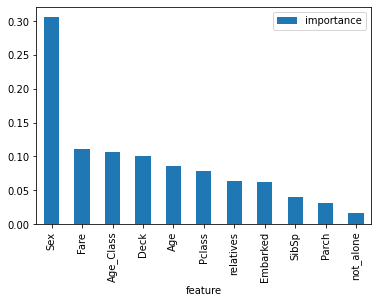

In [ ]:
importances.plot.bar()

In [ ]:
# not_alone and Parch are not important in random forest predictions.
# we drop them and see updated results
train_data  = train_data.drop("not_alone", axis=1)
test_data  = test_data.drop("not_alone", axis=1)

train_data  = train_data.drop("Parch", axis=1)
test_data  = test_data.drop("Parch", axis=1)

In [ ]:
# this time set out of bag samples to true
random_forest2 = RandomForestClassifier(n_estimators=100, oob_score = True)

# fit
random_forest2.fit(X_train, Y_train)

# predict
Y_pred_rf2 = random_forest2.predict(X_test)

# score
random_forest2.score(X_train, Y_train)
acc_random_forest2 = round(random_forest2.score(X_train, Y_train) * 100, 2)

acc_random_forest2

92.59

In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

AttributeError: ignored

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

#now it is called best_params
clf.best_params_


{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100,
                                        
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)


random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.6 %


In [ ]:
# Evaluation of a classification model is more complicated than eval of a regression model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[485,  64],
       [104, 238]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

# Our model predicts 81% of the time, a passengers survival correctly (precision). 
# The recall tells us that it predicted the survival of 72 % of the people who actually survived.

Precision: 0.7880794701986755
Recall: 0.695906432748538


In [ ]:
# You can combine precision and recall into one score, which is called the F-score. 
# The F-score is computed with the harmonic mean of precision and recall. 
# Note that it assigns much more weight to low values. 
# As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7391304347826086

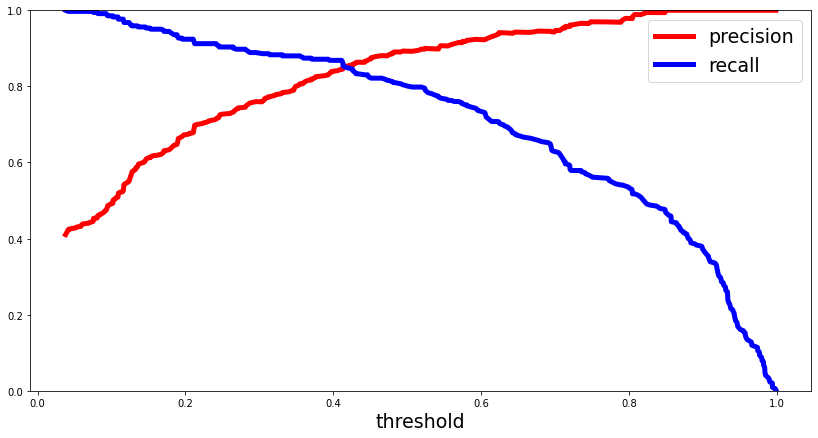

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

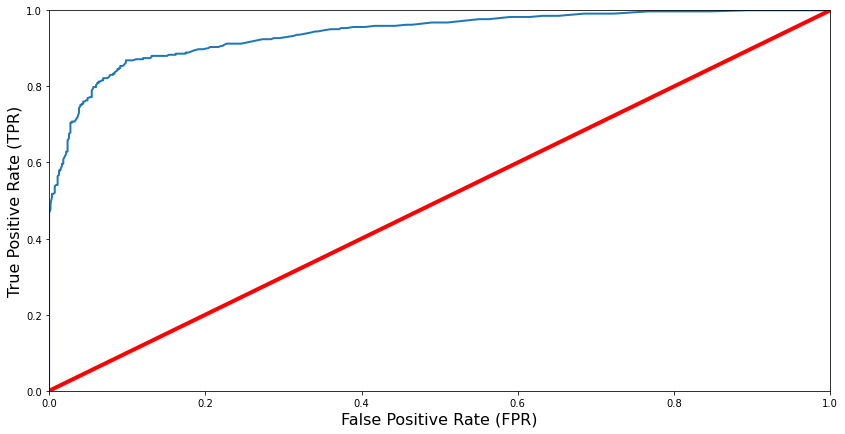

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9393527839026832


In [ ]:
## output set up to use predictions_rfc
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred_rf2})

## output to be saved in csv
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
